# Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH)

[**Source**] Clustering technique used in paper, **A Collaborative Computer Aided Diagnosis (C-CAD) System with Eye-Tracking, Sparse Attentional Model, and Deep Learning** (https://arxiv.org/abs/1802.06260).

### **What's BIRCH algorithm**

Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) is a clustering algorithm that is commonly used for data mining and machine learning. It was developed by Tian Zhang, Raghu Ramakrishnan, and Miron Livny in 1996.

BIRCH is a memory-efficient algorithm that can handle large datasets. It works by recursively clustering the data using a hierarchical approach. The algorithm first builds a tree structure called the Cluster Feature Tree (CFT) by recursively clustering the data points. The CFT has a hierarchical structure, where each node represents a sub-cluster and the root node represents the entire dataset. The nodes in the CFT are linked to form a tree using a clustering algorithm called CF (Clustering Feature).

BIRCH uses a distance-based clustering criterion to decide whether to merge two sub-clusters or create a new one. The distance between two sub-clusters is calculated based on their proximity in the feature space. BIRCH also uses a clustering threshold, which determines the maximum diameter of a sub-cluster. If a sub-cluster exceeds this threshold, it is split into smaller sub-clusters.

The BIRCH algorithm has several advantages. First, it can handle large datasets efficiently since it only needs to store the CFT in memory. Second, it is scalable and can handle streaming data. Third, it is flexible and can handle different types of data.

However, BIRCH also has some limitations. It is sensitive to the choice of parameters, such as the clustering threshold and the CF distance metric. It also assumes that the data is roughly spherical and equally distributed, which may not always be the case in real-world datasets.

# What are the parameters?

- `threshold`: The radius of the subcluster obtained by merging a new sample and the closest subcluster should be lesser than the threshold. Otherwise a new subcluster is started. Setting this value to be very low promotes splitting and vice-versa.
- `branching_factor`: Maximum number of CF subclusters in each node.


## Visualise the cluster feature (CF) Tree generation.

####  Clustering Process 
This clustering algorithm consider the instances one by one (order matters). The first instance $i_{1}$ create the CF, $A$.

![](1.png)

Let $T$ be the `threshold` distance, and $C_{A}$ to be centre of the A CF.  When the second instance $i_{2}$ come in, if $\text{distance}(C_{A},i_{2})<T$, the $i_{2}$ will belong to cluster $A$.

![](2.png)

When $\text{distance}(C_{A},i_{3})> T$, another cluster $B$ will be created. 

![](3.png)

Then we continue to do this:

![](4.png)

Until `branching_factor`, $L=3$, is reached. When a CF exceed the maximum number of CF subclusters:

![](5.png)

This CF will be split into two CFs. 

![](6.png)

Because the root contains more than 3 CFs, it's split into 2 subclusters again.

![](7.png)



### **What does BIRCH differ from other clustering algorithm?**

##### **Pros**:

Scalability: BIRCH can handle very large datasets efficiently by incrementally building a tree-based data structure, known as the Cluster Feature Tree (CFT), which summarizes the data and enables efficient clustering.
Robustness to noise: BIRCH can handle noisy and outlier-prone datasets by using a clustering threshold that limits the diameter of subclusters.
Memory efficiency: BIRCH can efficiently handle datasets with low memory constraints as it only requires a single scan of the data and maintains a condensed representation of the data in the CFT.
Ability to handle streaming data: BIRCH can handle streaming data, meaning that it can incrementally update the CFT as new data points arrive and adapt to changes in the underlying data distribution.
Does not require pre-specified number of clusters: BIRCH can automatically determine the number of clusters from the data.


##### **Cons**:

Not suitable for all types of data: BIRCH works best with datasets that have a globular structure, where the clusters are tightly packed and have similar diameters. It may not perform as well on datasets with complex or irregular structures.
May produce suboptimal clustering results: BIRCH can produce suboptimal clustering results when the shape of the clusters is not spherical, and the variance within clusters is not uniform.
Limited applicability to high-dimensional data: BIRCH's performance can degrade for high-dimensional data due to the curse of dimensionality.
Sensitivity to hyperparameters: The clustering threshold and branching factor parameters in BIRCH can significantly impact the resulting clustering, and tuning these parameters can be challenging.
Requires careful pre-processing of data: The performance of BIRCH can be sensitive to the pre-processing steps such as scaling and normalization of the data.

### **what's the parameters used in the paper?**
They are not mentioned in the paper.

In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
gaze_df = pd.read_csv("gaze.csv")
gaze_df = gaze_df[~(gaze_df['x_position'].isna() | gaze_df['x_position'].isna())]
gaze_df.head(5)

,timestamp_sample,x_position,y_position,pupil_area_normalized,angular_resolution_x_pixels_per_degree,angular_resolution_y_pixels_per_degree,window_width,window_level,xmin_shown_from_image,ymin_shown_from_image,xmax_shown_from_image,ymax_shown_from_image,xmin_in_screen_coordinates,ymin_in_screen_coordinates,xmax_in_screen_coordinates,ymax_in_screen_coordinates
0,0.026,1194.0,1538.0,0.895,115.0,115.0,1.0002,0.50012,0,0,2544,3056,1021,0,2819,2160
1,0.027,1194.0,1536.0,0.895,115.0,115.0,1.0002,0.50012,0,0,2544,3056,1021,0,2819,2160
2,0.028,1196.0,1534.0,0.895,115.0,115.0,1.0002,0.50012,0,0,2544,3056,1021,0,2819,2160
3,0.029,1196.0,1529.0,0.896,115.0,115.0,1.0002,0.50012,0,0,2544,3056,1021,0,2819,2160
4,0.030,1196.0,1527.0,0.896,115.0,115.0,1.0002,0.50012,0,0,2544,3056,1021,0,2819,2160


In [3]:
gaze_points = np.array([(x,y) for x, y in zip(gaze_df['x_position'], gaze_df['y_position'])])
g_mean = np.mean(gaze_points, axis=0)
g_std = np.std(gaze_points, axis=0)
min_x, min_y = (np.array([0, 0]) - g_mean)/g_std
max_x, max_y = (np.array([2544, 3056]) - g_mean)/g_std
# Normalize the data
norm_gaze_points = (gaze_points - g_mean) / g_std

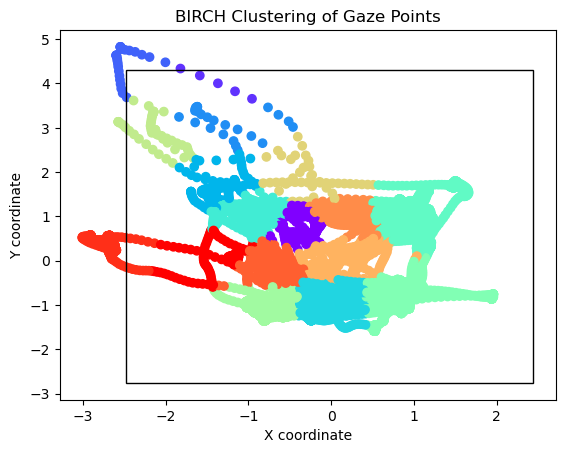

In [4]:
# Choose clustering parameters
threshold = 0.5 # clustering threshold
branching_factor = 50  # branching factor
n_clusters = None  # number of clusters (None means BIRCH will choose automatically)

# Initialize the BIRCH algorithm
birch = Birch(threshold=threshold, branching_factor=branching_factor, n_clusters=n_clusters)

# Fit the BIRCH algorithm to the gaze point data
birch.fit(norm_gaze_points)

# Generate the clustering output
subcluster_labels = birch.predict(norm_gaze_points)

fig, ax = plt.subplots()

# Visualize the clustering results
plt.scatter(norm_gaze_points[:, 0], norm_gaze_points[:, 1], c=subcluster_labels, cmap='rainbow')
ax.add_patch(Rectangle((min_x, min_y), abs(max_x-min_x), abs(max_y-min_y), fill=False))
plt.title('BIRCH Clustering of Gaze Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

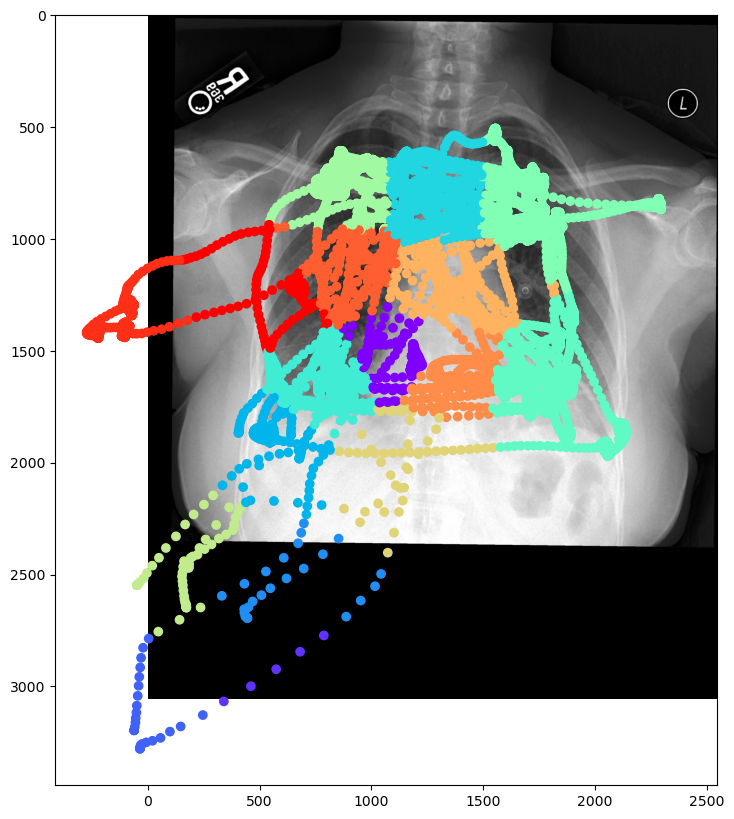

In [5]:
from PIL import Image
cxr = Image.open('cxr.jpg').convert("RGB")
fig = plt.figure(figsize=(10,10))
plt.imshow(cxr)
plt.scatter((norm_gaze_points[:, 0]*g_std[0]) + g_mean[0] , (norm_gaze_points[:, 1]*g_std[1])+g_mean[1], c=subcluster_labels, cmap='rainbow')
# plt.scatter(gaze_df['x_position'], gaze_df['y_position'], c=subcluster_labels, cmap='rainbow')

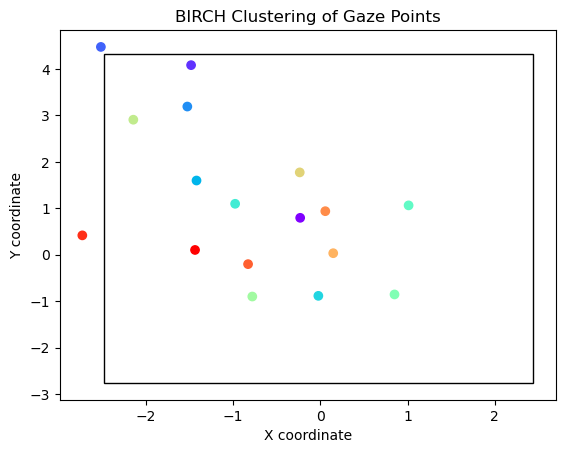

In [6]:
fig, ax = plt.subplots()
plt.scatter(birch.subcluster_centers_[:, 0], birch.subcluster_centers_[:, 1], c=birch.subcluster_labels_, cmap='rainbow')
ax.add_patch(Rectangle((min_x, min_y), abs(max_x-min_x), abs(max_y-min_y), fill=False))
plt.title('BIRCH Clustering of Gaze Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

In [7]:
print(f"Number of the clusters: [{len(birch.subcluster_labels_)}]")

Number of the clusters: [17]


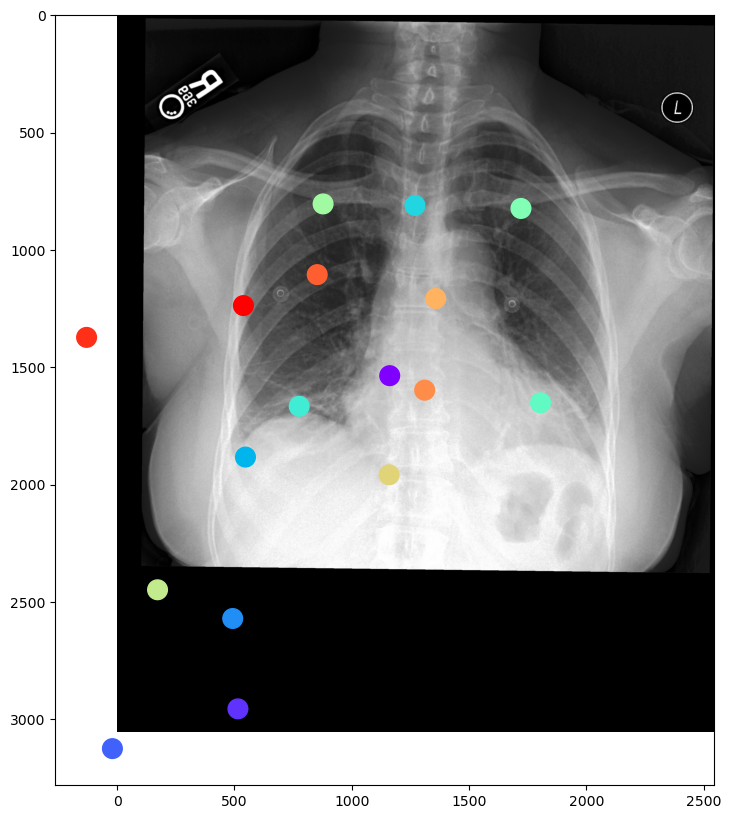

In [8]:
from PIL import Image
cxr = Image.open('cxr.jpg').convert("RGB")
fig = plt.figure(figsize=(10,10))
plt.imshow(cxr)
plt.scatter((birch.subcluster_centers_[:, 0]*g_std[0]) + g_mean[0] , (birch.subcluster_centers_[:, 1]*g_std[1])+g_mean[1], c=birch.subcluster_labels_, cmap='rainbow', s=200)